# Dataset Visualizer

In [1]:
from dataset import CLIPSet
from termcolor import cprint
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline


### Create a dataset object from a single pkl file

In [2]:
data_path = "./data/train_final.pkl"

dataset = CLIPSet(pickle_file_path=data_path, visualize=True)

Pickle file exists. Loading from pickle file
Delay frame is : 30


In [3]:
print('length of dataset: ', len(dataset))

length of dataset:  3330


### Initialize a random index to choose a data sample from

In [4]:
index = random.randint(0, len(dataset) - dataset.delay - 1)
# index = 0
cprint(f'index: {index}', color='green')

index: 974


### Get lidar and joystick samples 

In [5]:
lidar, joy = dataset[index]

### View joystick sample as a table

In [6]:
joy_df = pd.DataFrame(data=joy, columns=[
                                      'linear_x', 'linear_y', 'angular_z'])
joy_df

,linear_x,linear_y,angular_z
0,1.6,-0.044777,-0.0
1,1.6,-0.044777,-0.0
2,1.6,-0.044777,-0.0
3,1.6,-0.044777,-0.0
4,1.6,-0.044777,-0.0
...,...,...,...
425,1.6,-0.018967,-0.0
426,1.6,-0.018967,-0.0
427,1.6,-0.018967,-0.0
428,1.6,-0.018967,-0.0


### Measure the variability in length of joystick samples

In [7]:
joy_lengths = [dataset[i][1].shape[0] for i in range(len(dataset) - dataset.delay)]
min_joy_length = min(joy_lengths)
max_joy_length = max(joy_lengths)
mean_joy_length = sum(joy_lengths) / len(joy_lengths)

print('minimum joystick sequence length: ', min_joy_length)
print('maximum joystick sequence length: ', max_joy_length)
print('mean joystick sequence length: ', mean_joy_length)

minimum joystick sequence length:  324
maximum joystick sequence length:  790
mean joystick sequence length:  439.2730303030303


### Measure the variability in the joystick readings

In [8]:
linear_x_max = joy_df['linear_x'].max()
linear_x_min = joy_df['linear_y'].min()
linear_x_avg = joy_df['linear_x'].mean()

linear_y_max = joy_df['linear_y'].max()
linear_y_min = joy_df['linear_y'].min()
linear_y_avg = joy_df['linear_y'].mean()

angular_z_max = joy_df['angular_z'].max()
angular_z_min = joy_df['angular_z'].min()
angular_z_avg = joy_df['angular_z'].mean()

In [9]:
joy_stats = {"linear_x": [linear_x_max, linear_x_min, linear_x_avg], "linear_y": [
    linear_y_max, linear_y_min, linear_y_avg], "angular_z": [angular_z_max, angular_z_min, angular_z_avg]}

joy_stats_df = pd.DataFrame(data=joy_stats, columns=[
                            'linear_x', 'linear_y', 'angular_z'], index=['max', 'min', 'avg'])

joy_stats_df


,linear_x,linear_y,angular_z
max,1.600000,-0.018967,0.161504
min,-0.109302,-0.109302,-0.000000
avg,1.600000,-0.055491,0.026949


### Visualize the bev lidar image stack

get index:  974 , actual index:  1004


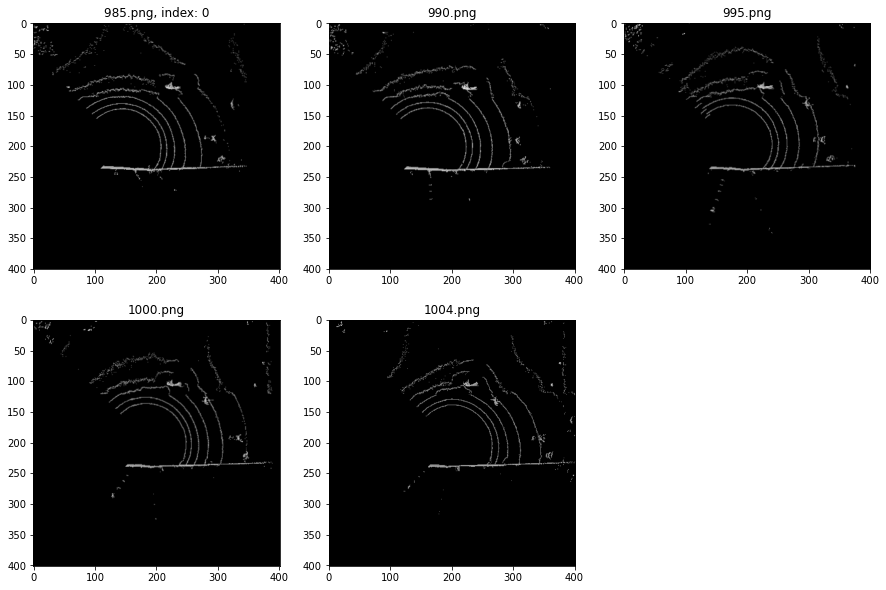

In [10]:
fig = plt.figure(figsize=(15, 10), num=index)
rows = 2
columns = 3

print('get index: ', index, ', actual index: ', index + dataset.delay)

lidar_imgs = lidar[0]
img_file_names = lidar[1]

fig.add_subplot(rows, columns, 1)
plt.imshow(lidar_imgs[0], cmap='gray')
plt.title(f'{img_file_names[0]}, index: 0')

fig.add_subplot(rows, columns, 2)
plt.imshow(lidar_imgs[1], cmap='gray')
plt.title(img_file_names[1])

fig.add_subplot(rows, columns, 3)
plt.imshow(lidar_imgs[2], cmap='gray')
plt.title(img_file_names[2])

fig.add_subplot(rows, columns, 4)
plt.imshow(lidar_imgs[3], cmap='gray')
plt.title(img_file_names[3])

fig.add_subplot(rows, columns, 5)
plt.imshow(lidar_imgs[4], cmap='gray')
plt.title(img_file_names[4]);
